<table align="left" ><tr><th >
  <a target="_blank"  href="http://www.fsdmfes.ac.ma/"><img src="assets/usmba.png" width=70px /></a>
</th><th>
  <a target="_blank"  href="http://www.fsdmfes.ac.ma/"><img src="assets/fsdm.png" width=75px/></a>
</th><th>
  <a target="_blank"  href="https://www.univ-paris13.fr/"><img src="assets/uspn.png" width=150px/></a>
</th><th>
  <a target="_blank"  href="http://www.imperium-media.com/"><img src="assets/imperium_media.png" width=70px/></a>
</th></tr><tr><td style="text-align:center;">
    <a target="_blank"  href="http://www.fsdmfes.ac.ma/">USMBA</a>
</td><td style="text-align:center;">
    <a target="_blank"  href="http://www.fsdmfes.ac.ma/">FSDM</a>
</td><td style="text-align:center;">
    <a target="_blank"  href="https://www.univ-paris13.fr/">USPN</a>
</td><td style="text-align:center;">
    <a target="_blank"  href="http://www.imperium-media.com/">IMPERIUM MEDIA</a>
</td></tr></table>
</b>

# Object Detection with Deep Learning: A Review (2001-2020) #


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/m-elkhou/Object-Detection/blob/master/object_detection.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/m-elkhou/Object-Detection/blob/master/object_detection.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>
<div align="center"><img src="assets/1.png" /></div>

## Abstract
Due to object detection’s close relationship with video analysis and image understanding, it has attracted much research attention in recent years. Traditional object detection methods are built on handcrafted features and shallow trainable architectures.

En raison de la relation étroite de la détection d'objets avec l'analyse vidéo et la compréhension d'images, elle a attiré beaucoup d'attention de la recherche ces dernières années.

## INTRODUCTION

To gain a complete image understanding, we should not only concentrate on classifying different images, but also try to precisely estimate the concepts and locations of objects contained in each image. This task is referred as object detection , which usually consists of different subtasks such as face detection , pedestrian detection and skeleton detection . As one of the fundamental computer vision problems, object detection is able to provide valuable information for semantic understanding of images and videos, and is related to many applications, including image classification, human behavior analysis , face recognition and autonomous driving . 
Meanwhile, Inheriting from neural networks and related learning systems, the progress in these fields will develop neural network algorithms, and will also have great impacts on object detection techniques which can be considered as learning systems. However, due to large variations in viewpoints, poses, occlusions and lighting conditions, it’s difficult to perfectly accomplish object detection with an additional object localization task. So much attention has been attracted to this field in recent years .
The problem definition of object detection is to determine where objects are located in a given image (object localization) and which category each object belongs to (object classification).
So the pipeline of traditional object detection models can be mainly divided into three stages: informative region selection, feature extraction and classification.

**Informative region selection**. As different objects may appear in any positions of the image and have different aspect ratios or sizes, it is a natural choice to scan the whole image with a multi-scale sliding window. Although this exhaustive strategy can find out all possible positions of the objects, its shortcomings are also obvious. Due to a large number of candidate windows, it is computationally expensive and produces too many redundant windows. However, if only a fixed number of sliding window templates are applied, unsatisfactory regions may be produced.

**Feature extraction** : To recognize different objects, we need to extract visual features which can provide a semantic and robust representation. SIFT , HOG  and Haar-like features are the representative ones. This is due to the fact that these features can produce representations associated with complex cells in human brain . However, due to the diversity of appearances, illumination conditions and backgrounds, it’s difficult to manually design a robust feature descriptor to perfectly describe all kinds of objects.

**Classification**. Besides, a classifier is needed to distinguish a target object from all the other categories and to make the representations more hierarchical, semantic and informative for visual recognition. Usually, the Supported Vector Machine (SVM) , AdaBoost and Deformable Part-based Model (DPM) are good choices. Among these classifiers, the DPM is a flexible model by combining object parts with deformation cost to handle severe deformations. In DPM, with the aid of a graphical model, carefully designed low-level features and kinematically inspired part decompositions are combined. And discriminative learning of graphical models allows for building high -precision part-based models for a variety of object classes.

## Viola-Jones Algorithm, 2001 (The first efficient Face Detector)

- An efficient algorithm for face detection was invented by Paul Viola & Michael Jones 
- Their demo showed faces being detected in real time on a webcam feed.
- Was the most stunning demonstration of computer vision and its potential at the time. 
- Soon, it was implemented in OpenCV & face detection became synonymous with Viola and Jones algorithm.
<!-- https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/1.png -->

<div align="center">
    <img src="assets/vg1.png"/>
    <img src="assets/vg2.jpg"/>
</div>


## Histograms of Oriented Gradients, 2005 (Much more efficient detection technique)

- Navneet Dalal and Bill Triggs invented "HOG" for pedestrian detection
- Their feature descriptor, Histograms of Oriented Gradients (HOG), significantly outperformed existing algorithms in this task
- Handcoded features, just like before

- For every single pixel, we want to look at the pixels that directly surrounding it:

<div align="center">
    <img src="assets/hog1.gif"/>
</div>

- Goal is, how dark is current pixel compared to surrounding pixels?
- We will then draw an arrow showing in which direction the image is getting darker:

<div align="center">
    <img src="assets/hog2.gif"/>
</div>

- We repeat that process for every single pixel in the image
- Every pixel is replaced by an arrow. These arrows are called gradients
- Gradients show the flow from light to dark across the entire image:

<div align="center">
    <img src="assets/hog3.gif" width=600/>
</div>

- We'll break up the image into small squares of 16x16 pixels each
- In each square, we’ll count up how many gradients point in each major direction
- Then we’ll replace that square in the image with the arrow directions that were the strongest.
- End result? Original image converted into simple representation that captures basic structure of a face in a simple way:
- Detecting faces means find the part of our image that looks the most similar to a known HOG pattern that was extracted from a bunch of other training faces:

<div align="center">
    <img src="assets/hog4.png" width=700/>
</div>

### Types of image processing

This time our focus will be to automatically label all the shapes in an image and find out where each of them are, down to the pixel. This type of task is  called “object segmentation”. During your exploration of computer vision you may have also come across terms like “object recognition”, “class segmentation”, and “object detection”. These all sound similar and can be confusing at first, but seeing what they do helps clear it up. Below are examples of what kind of information we get from each of the four types. Tasks become more difficult as we move from left to right.

<div align="center">
    <img src="assets/compter_vision_problems.png"/>
</div>

- **Object recognition** tells us what is in the image, but not where or how much.
- **Class segmentation** adds position information to the different types of objects in the image. 
- **Object detection** separates out each object with a rough bounding box. 
- **Object segmentation**. It gives every shape a clear boundary, which can also be used to create the results from the previous three.

With a simple dataset like the one we’re using here, we could probably use old school computer vision ideas like Hough (pronounced Huff) circle and line detection or template matching to get pretty good results. But by using deep learning we don’t have to change our approach much to get the same type of results on nearly any type of image dataset. And all without having to think about which exact features we’re looking for. It’s almost magic.

## Convolutional Neural Networks CNN
> The Deep Learning Era begins (2012)

“NN”s are neural networks. They’re an idea inspired by how we imagined biological neurons worked. A neural network is a collection of connected neurons and each neuron outputs a signal depending on its inputs and internal parameters. When we train a neural network, we adjust neuron internal parameters to create the outputs we expect.

<div align="center">
    <img src="assets/nn.jpeg"/>
</div>

The “C” stands for “convolutional”. CNNs were designed specifically for  learning with images, but are otherwise similar to standard neural networks. They learn filters that slide (“convolve”) across and down images in small sections at time, instead of going through the entire image at once. CNNs use less parameters and memory than regular neural networks, which allows them to work on much larger images than a traditional neural network.

- Convolutional Neural Networks became the gold standard for image classification after Kriszhevsky's CNN's performance during ImageNet

<div align="center">
    <img src="assets/cnn.jpg"/>
</div>

While these results are impressive, image classification is far simpler than the complexity and diversity of true human visual understanding.

<div align="center">
    <img src="assets/cnn1.png"/>
</div>

In classification, there’s generally an image with a single object as the focus and the task is to say what that image is

<div align="center">
    <img src="assets/image-classification-vs-object-detection.png"  width=720/>
</div>

But when we look at the world around us, we carry out far more complex task

<div align="center">
    <img src="assets/cnn3.png"/>
</div>

We see complicated sights with multiple overlapping objects, and different backgrounds and we not only classify these different objects but also identify their boundaries, differences, and relations to one another!

Can CNNs help us with such complex tasks? Yes.

<div align="center">
    <img src="assets/cnn2.png" width=620/>
    <img src="assets/cnn4.png" width=620/>
</div>

- We can take a classifier like VGGNet or Inception and turn it into an object detector by sliding a small window across the image
- At each step you run the classifier to get a prediction of what sort of object is inside the current window. 
- Using a sliding window gives several hundred or thousand predictions for that image, but you only keep the ones the classifier is the most certain about.


<div align="center">
    <img src="assets/padding_strides.gif"/>
</div>

- This approach works but it’s obviously going to be very slow, since you need to run the classifier many times.

## Region-based Convolutional Network (R-CNN)

The first models intuitively begin with the region search and then perform the classification. In R-CNN, the **Selective Search** method developed by [J.R.R. Uijlings and al. (2012)](http://www.huppelen.nl/publications/selectiveSearchDraft.pdf) is an alternative to exhaustive search in an image to capture object location. It initializes small regions in an image and merges them with a hierarchical grouping. Thus the final group is a box containing the entire image. The detected regions are merged according to a variety of color spaces and similarity metrics. The output is a few number of region proposals which could contain an object by merging small regions.

![Alt Text](assets/rcnn.png)

The R-CNN model ([Ross Girshick and al. (2013-2014)](https://arxiv.org/abs/1311.2524)) combines the selective search method to detect region proposals and deep learning to find out the object in these regions. 

To bypass the problem of selecting a huge number of regions, Ross Girshick et al. proposed a method where we use selective search to extract just 2000 regions from the image and he called them **region proposals**. Therefore, now, instead of trying to classify a huge number of regions, you can just work with 2000 regions. These 2000 region proposals are generated using the selective search algorithm.

Let’s first understand what selective search is and how it identifies the different regions. There are basically four regions that form an object: varying scales, colors, textures, and enclosure. Selective search identifies these patterns in the image and based on that, proposes various regions. Here is a brief overview of how selective search works:

1. It first takes an image as input:
![](assets/rcn1.png)
2. Then, it generates initial sub-segmentations so that we have many candidate regions from this image:
![](assets/rcnn2.png)
3. The technique then combines the similar regions to form a larger region (based on color similarity, texture similarity, size similarity, and shape compatibility):
![](assets/rcnn3.png)
4. Finally, these regions then produce the final object locations (Region of Interest).

Below is a succint summary of the steps followed in RCNN to detect objects:

![Alt Text](assets/rcnn4.png)
The architecture of R-CNN. (Image source: [R. Girshick and al. (2014)](https://arxiv.org/abs/1311.2524))

1. Scan the input image for possible objects using an algorithm called Selective Search, generating ~2000 region proposals
2. Run a convolutional neural net (CNN) on top of each of these region proposals
3. Take the output of each CNN and feed it into a) an SVM to classify the region and b) a linear regressor to tighten the bounding box of the object, if such an object exists.

These 3 steps are illustrated in the image below:
![Alt Text](assets/rcnn5.png)
R-CNN. Each region proposal feeds a CNN to extract a features vector, possible objects are detected using multiple SVM classifiers and a linear regressor modifies the coordinates of the bounding box. Source: [J. Xu’s Blog](https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9)

These 2000 candidate region proposals are warped into a square and fed into a convolutional neural network that produces a 4096-dimensional feature vector as output. The CNN acts as a feature extractor and the output dense layer consists of the features extracted from the image and the extracted features are fed into an SVM to classify the presence of the object within that candidate region proposal. In addition to predicting the presence of an object within the region proposals, the algorithm also predicts four values which are offset values to increase the precision of the bounding box. For example, given a region proposal, the algorithm would have predicted the presence of a person but the face of that person within that region proposal could’ve been cut in half. Therefore, the offset values help in adjusting the bounding box of the region proposal.

In other words, we first propose regions, then extract features, and then classify those regions based on their features. In essence, we have turned object detection into an image classification problem. R-CNN was very intuitive, but very slow.

#### Problems with R-CNN
- It still takes a huge amount of time to train the network as you would have to classify 2000 region proposals per image.
- It cannot be implemented real time as it takes around 47 seconds for each test image.
- The selective search algorithm is a fixed algorithm. Therefore, no learning is happening at that stage. This could lead to the generation of bad candidate region proposals.

## Fast Region-based Convolutional Network (Fast R-CNN)

The purpose of the Fast Region-based Convolutional Network (Fast R-CNN) developed by [R. Girshick, (2015)](https://arxiv.org/pdf/1504.08083.pdf) is to reduce the time consumption related to the high number of models necessary to analyse all region proposals.
Instead of running a CNN 2,000 times per image, we can run it just once per image and get all the regions of interest (regions containing some object).

![The architecture of Fast R-CNN](assets/fast_r-cnn.png)
The architecture of Fast R-CNN. (Image source: [Girshick, 2015](https://arxiv.org/pdf/1504.08083.pdf))

Ross Girshick, the author of RCNN, came up with this idea of running the CNN just once per image and then finding a way to share that computation across the 2,000 regions. In Fast RCNN, we feed the input image to the CNN, which in turn generates the convolutional feature maps. Using these maps, the regions of proposals are extracted. We then use a **RoI pooling** layer to reshape all the proposed regions into a fixed size, so that it can be fed into a fully connected network.

#### RoI pooling :
It is a type of max pooling to convert features in the projected region of the image of any size, h x w, into a small fixed window, H x W. The input region is divided into H x W grids, approximately every subwindow of size h/H x w/W. Then apply max-pooling in each grid.
<img src="assets/roi-pooling.png" width=620/>

Fig. RoI pooling (Image source: [Stanford CS231n slides.](http://cs231n.stanford.edu/slides/2016/winter1516_lecture8.pdf))

Let’s break this down into steps to simplify the concept:

1. We follow the now well-known step of taking an image as input:
![](assets/fast_r-cnn1.png)
2. This image is passed to a ConvNet which returns the Regions of Interest accordingly:
![](assets/fast_r-cnn2.png)
3. Then we apply the RoI pooling layer on the extracted regions of interest to make sure all the regions are of the same size:
![](assets/fast_r-cnn3.png)
4. Finally, these regions are passed on to a fully connected network which classifies them, as well as returns the bounding boxes using softmax and linear regression layers simultaneously:
![](assets/fast_r-cnn4.png)

This is how Fast RCNN resolves two major issues of RCNN, i.e., passing one instead of 2,000 regions per image to the ConvNet, and using one instead of three different models for extracting features, classification and generating bounding boxes.

The best Fast R-CNNs have reached mAp scores of 70.0% for the 2007 PASCAL VOC test dataset, 68.8% for the 2010 PASCAL VOC test dataset and 68.4% for the 2012 PASCAL VOC test dataset.
![](assets/fast_r-cnn5.png)

### Problems with Fast RCNN
But even Fast RCNN has certain problem areas. It also uses selective search as a proposal method to find the Regions of Interest, which is a slow and time consuming process. It takes around 2 seconds per image to detect objects, which is much better compared to RCNN. But when we consider large real-life datasets, then even a Fast RCNN doesn’t look so fast anymore.

## Faster Region-based Convolutional Network (Faster R-CNN)

Region proposals detected with the selective search method were still necessary in the previous model, which is computationally expensive. S. Ren and al. (2016) have introduced Region Proposal Network (RPN) to directly generate region proposals, predict bounding boxes and detect objects. The Faster Region-based Convolutional Network (Faster R-CNN) is a combination between the RPN and the Fast R-CNN model.

A CNN model takes as input the entire image and produces feature maps. A window of size 3x3 slides all the feature maps and outputs a features vector linked to two fully-connected layers, one for box-regression and one for box-classification. Multiple region proposals are predicted by the fully-connected layers. A maximum of k regions is fixed thus the output of the box-regression layer has a size of 4k (coordinates of the boxes, their height and width) and the output of the box-classification layer a size of 2k (“objectness” scores to detect an object or not in the box). The k region proposals detected by the sliding window are called anchors.

![Alt Text](assets/faster_rcnn.png)
Detecting the anchor boxes for a single 3x3 window. Source: [S. Ren and al. (2016)](https://arxiv.org/pdf/1506.01497.pdf)


When the anchor boxes are detected, they are selected by applying a threshold over the “objectness” score to keep only the relevant boxes. These anchor boxes and the feature maps computed by the initial CNN model feeds a Fast R-CNN model.

Faster R-CNN uses RPN to avoid the selective search method, it accelerates the training and testing processes, and improve the performances. The RPN uses a pre-trained model over the ImageNet dataset for classification and it is fine-tuned on the PASCAL VOC dataset. Then the generated region proposals with anchor boxes are used to train the Fast R-CNN. This process is iterative.

The best Faster R-CNNs have obtained mAP scores of 78.8% over the 2007 PASCAL VOC test dataset and 75.9% over the 2012 PASCAL VOC test dataset. They have been trained with PASCAL VOC and COCO datasets. One of these models² is 34 times faster than the Fast R-CNN using the selective search method.

![Alt Text](assets/faster_rcnn1.png)
The entire image feeds a CNN model to produce anchor boxes as region proposals with a confidence to contain an object. A Fast R-CNN is used taking as inputs the feature maps and the region proposals. For each box, it produces probabilities to detect each object and correction over the location of the box. Source: [J. Xu’s Blog](https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9)

## Region-based Fully Convolutional Network (R-FCN)
Fast and Faster R-CNN methodologies consist in detecting region proposals and recognize an object in each region. The Region-based Fully Convolutional Network (R-FCN) released by J. Dai and al. (2016) is a model with only convolutional layers³ allowing complete backpropagation for training and inference. The authors have merged the two basic steps in a single model to take into account simultaneously the object detection (location invariant) and its position (location variant).

A ResNet-101 model takes the initial image as input. The last layer outputs feature maps, each one is specialized in the detection of a category at some location. For example, one feature map is specialized in the detection of a cat, another one in a banana and so on. Such feature maps are called position-sensitive score maps because they take into account the spatial localization of a particular object. It consists of k*k*(C+1) score maps where k is the size of the score map, and C the number of classes. All these maps form the score bank. Basically, we create patches that can recognize part of an object. For example, for k=3, we can recognize 3x3 parts of an object.

In parallel, we need to run a RPN to generate Region of Interest (RoI). Finally, we cut each RoI in bins and we check them against the score bank. If enough of these parts are activated, then the patch vote ‘yes’, I recognized the object.

<img width=620 src="assets/r-fcn.png"/>
<img width=620 src="assets/r-fcn1.png"/>

The input image feeds a ResNet model to produce feature maps. A RPN model detects the Region of Interests and a score is computed for each region to determine the most likely object if there is one. 
Source: [J. Dai and al. (2016)](https://arxiv.org/pdf/1605.06409.pdf).


J. Dai and al. (2016) have detailed an example displayed below. The figures show the reaction of a R-FCN model specialized in detecting a person. For a RoI in the center of the image (Figure 3), the subregions in the feature maps are specific to the patterns associated to a person. Thus they vote for ‘yes, there is a person at this location’. In the Figure 4, the RoI is shifted to the right and it is no longer centred on the person. The subregions in the feature maps do not agree on the person detection, thus they vote ‘no, there is no person at this location’.

<img width=620 src="assets/r-fcn3.png"/>

Source: [J. Dai and al. (2016)](https://arxiv.org/pdf/1605.06409.pdf).

The best R-FCNs have reached mAP scores of 83.6% for the 2007 PASCAL VOC test dataset and 82.0%, they have been trained with the 2007, 2012 PASCAL VOC datasets and the COCO dataset. Over the test-dev dataset of the 2015 COCO challenge, they have had a score of 53.2% for an IoU = 0.5 and a score of 31.5% for the official mAP metric. The authors noticed that the R-FCN is 2.5–20 times faster than the Faster R-CNN counterpart.

## Semantic Segmentation

<div align="center"><img src="assets/semantic_segmentation.jpeg" width=720/></div>

Central to Computer Vision is the process of segmentation, which divides whole images into pixel groupings which can then be labelled and classified.

Particularly, Semantic Segmentation tries to semantically understand the role of each pixel in the image (e.g. is it a car, a motorbike, or some other type of class?). For example, in the picture above, apart from recognizing the person, the road, the cars, the trees, etc., we also have to delineate the boundaries of each object. Therefore, unlike classification, we need dense pixel-wise predictions from our models.

As with other computer vision tasks, CNNs have had enormous success on segmentation problems. One of the popular initial approaches was patch classification through a sliding window, where each pixel was separately classified into classes using a patch of images around it. This, however, is very inefficient computationally because we don’t reuse the shared features between overlapping patches.

The solution, instead, is UC Berkeley’s Fully Convolutional Networks (FCN), which popularized end-to-end CNN architectures for dense predictions without any fully connected layers. This allowed segmentation maps to be generated for images of any size and was also much faster compared to the patch classification approach. Almost all subsequent approaches to semantic segmentation adopted this paradigm.

<div align="center"><img src="assets/semantic_segmentation1.jpeg" width=720/></div>

However, one problem remains: convolutions at original image resolution will be very expensive. To deal with this, FCN uses downsampling and upsampling inside the network. The downsampling layer is known as striped convolution, while the upsampling layer is known as transposed convolution.

Despite the upsampling/downsampling layers, FCN produces coarse segmentation maps because of information loss during pooling. SegNet is a more memory efficient architecture than FCN that uses-max pooling and an encoder-decoder framework. In SegNet, shortcut/skip connections are introduced from higher resolution feature maps to improve the coarseness of upsampling/downsampling.

<div align="center"><img src="assets/semantic_segmentation2.jpeg" width=720/></div>

Recent research in Semantic Segmentation all relies heavily on fully convolutional networks, such as [Dilated Convolutions](https://arxiv.org/pdf/1511.07122.pdf), [DeepLab](https://arxiv.org/pdf/1412.7062.pdf), and [RefineNet](https://arxiv.org/pdf/1611.06612.pdf).

## Instance Segmentation

<div align="center"><img src="assets/instance_segmentation.jpeg" width=720/></div>

Beyond Semantic Segmentation, Instance Segmentation segments different instances of classes, such as labelling 5 cars with 5 different colors. In classification, there’s generally an image with a single object as the focus and the task is to say what that image is. But in order to segment instances, we need to carry out far more complex tasks. We see complicated sights with multiple overlapping objects and different backgrounds, and we not only classify these different objects but also identify their boundaries, differences, and relations to one another!


So far, we’ve seen how to use CNN features in many interesting ways to effectively locate different objects in an image with bounding boxes. Can we extend such techniques to locate exact pixels of each object instead of just bounding boxes? This instance segmentation problem is explored at Facebook AI using an architecture known as Mask R-CNN.



## Mask R-CNN ##

<div align="center"><img src="assets/instance_segmentation1.jpeg" /></div>

Much like Fast R-CNN, and Faster R-CNN, Mask R-CNN’s underlying intuition is straightforward Given that Faster R-CNN works so well for object detection, could we extend it to also carry out pixel-level segmentation?

Mask R-CNN does this by adding a branch to Faster R-CNN that outputs a binary mask that says whether or not a given pixel is part of an object. The branch is a Fully Convolutional Network on top of a CNN-based feature map. Given the CNN Feature Map as the input, the network outputs a matrix with 1s on all locations where the pixel belongs to the object and 0s elsewhere (this is known as a binary mask).

<div align="center">
    <img src="assets/mask_r-cnn.png" width=620 />
    <img src="assets/mask_r-cnn2.png" width=620 />
</div>

The MaskR-CNN framework for instance segmentation. (source: [He et al., 2017](https://arxiv.org/pdf/1703.06870.pdf))

Additionally, when run without modifications on the original Faster R-CNN architecture, the regions of the feature map selected by RoIPool (Region of Interests Pool) were slightly misaligned from the regions of the original image. Since image segmentation requires pixel-level specificity, unlike bounding boxes, this naturally led to inaccuracies. Mask R-CNN solves this problem by adjusting RoIPool to be more precisely aligned using a method known as RoIAlign (Region of Interests Align). Essentially, RoIAlign uses bilinear interpolation to avoid error in rounding, which causes inaccuracies in detection and segmentation.

Once these masks are generated, Mask R-CNN combines them with the classifications and bounding boxes from Faster R-CNN to generate such wonderfully precise segmentations:

<div align="center"><img src="assets/mask_r-cnn3.png" width=820/></div>


### Mask R-CNN Implimentation

In [12]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


There is a script that automatically migrates old TF-1 code to TF-2 code. From terminal just execute:

In [13]:
!tf_upgrade_v2 --intree Mask_RCNN --inplace --reportfile report.txt

INFO line 287:62: Added keywords to args of function 'tf.shape'
INFO line 324:55: Added keywords to args of function 'tf.shape'
INFO line 325:24: Added keywords to args of function 'tf.pad'
INFO line 341:11: Renamed 'tf.log' to 'tf.math.log'
INFO line 341:23: Renamed 'tf.log' to 'tf.math.log'
INFO line 399:17: Renamed 'tf.where' to 'tf.compat.v1.where'
INFO line 431:44: Added keywords to args of function 'tf.shape'
INFO line 439:43: Added keywords to args of function 'tf.shape'
INFO line 445:27: Added keywords to args of function 'tf.shape'
INFO line 445:48: Added keywords to args of function 'tf.shape'
INFO line 466:35: Added keywords to args of function 'tf.shape'
INFO line 467:26: Added keywords to args of function 'tf.shape'
INFO line 482:32: Added keywords to args of function 'tf.shape'
INFO line 482:53: Added keywords to args of function 'tf.shape'
INFO line 509:29: Added keywords to args of function 'tf.shape'
INFO line 518:19: Added keywords to args of function 'tf.boolean_mask

2020-04-05 20:00:44.696405: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-04-05 20:00:44.696664: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Install the software 

In [10]:
# !cd Mask_RCNN
# !python setup.py install

Confirm the Library Was Installed

In [15]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: c:\python\python37\lib\site-packages\mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


Download Model Weights
from : [mask_rcnn_coco.h5](https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5) (246 megabytes)

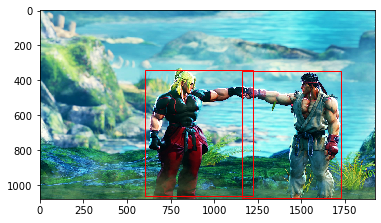

In [18]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
 
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes_list:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
# load photograph
img = load_img('images/perfectwallpaper.jpg')
img = img_to_array(img)
# import cv2
# img = cv2.imread('images/perfectwallpaper.jpg')
# make prediction
results = rcnn.detect([img], verbose=0)
# visualize the results
draw_image_with_boxes('images/perfectwallpaper.jpg', results[0]['rois'])

## Cascade R-CNN

## Cascade Mask R-CNN

## Single-Shot Detector (SSD)
Our final model is SSD, which stands for Single-Shot Detector. Like R-FCN, it provides enormous speed gains over Faster R-CNN, but does so in a markedly different manner.

Our first two models performed region proposals and region classifications in two separate steps. First, they used a region proposal network to generate regions of interest; next, they used either fully-connected layers or position-sensitive convolutional layers to classify those regions. SSD does the two in a “single shot,” simultaneously predicting the bounding box and the class as it processes the image.

Concretely, given an input image and a set of ground truth labels, SSD does the following:

- Pass the image through a series of convolutional layers, yielding several sets of feature maps at different scales (e.g. 10x10, then 6x6, then 3x3, etc.)
- For each location in each of these feature maps, use a 3x3 convolutional filter to evaluate a small set of default bounding boxes. These default bounding boxes are essentially equivalent to Faster R-CNN’s anchor boxes.
- For each box, simultaneously predict a) the bounding box offset and b) the class probabilities
- During training, match the ground truth box with these predicted boxes based on IoU. The best predicted box will be labeled a “positive,” along with all other boxes that have an IoU with the truth >0.5.

SSD sounds straightforward, but training it has a unique challenge. With the previous two models, the region proposal network ensured that everything we tried to classify had some minimum probability of being an “object.” With SSD, however, we skip that filtering step. We classify and draw bounding boxes from every single position in the image, using multiple different shapes, at several different scales. As a result, we generate a much greater number of bounding boxes than the other models, and nearly all of the them are negative examples.

To fix this imbalance, SSD does two things. Firstly, it uses non-maximum suppression to group together highly-overlapping boxes into a single box. In other words, if four boxes of similar shapes, sizes, etc. contain the same dog, NMS would keep the one with the highest confidence and discard the rest. Secondly, the model uses a technique called hard negative mining to balance classes during training. In hard negative mining, only a subset of the negative examples with the highest training loss (i.e. false positives) are used at each iteration of training. SSD keeps a 3:1 ratio of negatives to positives.

Its architecture looks like this:
![Alt Text](assets/ssd.png)

As I mentioned above, there are “extra feature layers” at the end that scale down in size. These varying-size feature maps help capture objects of different sizes. For example, here is SSD in action:
![Alt Text](assets/ssd1.png)

In smaller feature maps (e.g. 4x4), each cell covers a larger region of the image, enabling them to detect larger objects. Region proposal and classification are performed simultaneously: given p object classes, each bounding box is associated with a (4+p)-dimensional vector that outputs 4 box offset coordinates and p class probabilities. In the last step, softmax is again used to classify the object.

Ultimately, SSD is not so different from the first two models. It simply skips the “region proposal” step, instead considering every single bounding box in every location of the image simultaneously with its classification. Because SSD does everything in one shot, it is the fastest of the three models, and still performs quite comparably.

## You Only Look Once (YOLO)

### What is YOLO?

- YOLO takes a completely different approach. 
- It’s not a traditional classifier that is repurposed to be an object detector. 
- YOLO actually looks at the image just once (hence its name: You Only Look Once) but in a clever way.

YOLO divides up the image into a grid of 13 by 13 cells:

![Alt Text](assets/yolo1.png)

- Each of these cells is responsible for predicting 5 bounding boxes. 
- A bounding box describes the rectangle that encloses an object.
- YOLO also outputs a confidence score that tells us how certain it is that the predicted bounding box actually encloses some object.
- This score doesn’t say anything about what kind of object is in the box, just if the shape of the box is any good.

The predicted bounding boxes may look something like the following (the higher the confidence score, the fatter the box is drawn):

![Alt Text](assets/yolo2.png)

- For each bounding box, the cell also predicts a class. 
- This works just like a classifier: it gives a probability distribution over all the possible classes. 
- YOLO was trained on the PASCAL VOC dataset, which can detect 20 different classes such as:


- bicycle
- boat
- car
- cat
- dog
- person

- The confidence score for the bounding box and the class prediction are combined into one final score that tells us the probability that this bounding box contains a specific type of object. 
- For example, the big fat yellow box on the left is 85% sure it contains the object “dog”:

![Alt Text](assets/yolo3.png)

- Since there are 13×13 = 169 grid cells and each cell predicts 5 bounding boxes, we end up with 845 bounding boxes in total. 
- It turns out that most of these boxes will have very low confidence scores, so we only keep the boxes whose final score is 30% or more (you can change this threshold depending on how accurate you want the detector to be).

The final prediction is then:

![Alt Text](assets/yolo4.png)

- From the 845 total bounding boxes we only kept these three because they gave the best results. 
- But note that even though there were 845 separate predictions, they were all made at the same time — the neural network just ran once. And that’s why YOLO is so powerful and fast.

The architecture of YOLO is simple, it’s just a convolutional neural network:

<img src="assets/yolo5.png" width=500/>

This neural network only uses standard layer types: convolution with a 3×3 kernel and max-pooling with a 2×2 kernel. No fancy stuff. There is no fully-connected layer in YOLOv2.

The very last convolutional layer has a 1×1 kernel and exists to reduce the data to the shape 13×13×125. This 13×13 should look familiar: that is the size of the grid that the image gets divided into.

So we end up with 125 channels for every grid cell. These 125 numbers contain the data for the bounding boxes and the class predictions. Why 125? Well, each grid cell predicts 5 bounding boxes and a bounding box is described by 25 data elements:

- x, y, width, height for the bounding box’s rectangle
- the confidence score
- the probability distribution over the classes

Using YOLO is simple: you give it an input image (resized to 416×416 pixels), it goes through the convolutional network in a single pass, and comes out the other end as a 13×13×125 tensor describing the bounding boxes for the grid cells. All you need to do then is compute the final scores for the bounding boxes and throw away the ones scoring lower than 30%.

### Improvements to YOLO v1

YoLO v2 vs YoLO v1

- Speed (45 frames per second — better than realtime)
- Network understands generalized object representation (This allowed them to train the network on real world images and predictions on artwork was still fairly accurate).
- faster version (with smaller architecture) — 155 frames per sec but is less accurate.

Paper here
https://arxiv.org/pdf/1612.08242v1.pdf

### Code Walkthrough & demo

1. Using pretrained network
2. Training on your own dataset 



https://www.youtube.com/watch?v=w0tDDFip7KM

## Detectron2

<img src="assets/detectron2.png" width="300"/>

### Object Detection with PyTorch
Detectron2 is Facebook AI Research's next generation software system
that implements state-of-the-art object detection algorithms.
It is a ground-up rewrite of the previous version,
[Detectron](https://github.com/facebookresearch/Detectron/),
and it originates from [maskrcnn-benchmark](https://github.com/facebookresearch/maskrcnn-benchmark/).

<img src="assets/detectron.png"/>

Detectron is Facebook AI Research's software system that implements state-of-the-art object detection algorithms, including [Mask R-CNN](https://arxiv.org/abs/1703.06870). It is written in Python and powered by the [Caffe2](https://github.com/caffe2/caffe2) deep learning framework.

At FAIR, Detectron has enabled numerous research projects, including: [Feature Pyramid Networks for Object Detection](https://arxiv.org/abs/1612.03144), [Mask R-CNN](https://arxiv.org/abs/1703.06870), [Detecting and Recognizing Human-Object Interactions](https://arxiv.org/abs/1704.07333), [Focal Loss for Dense Object Detection](https://arxiv.org/abs/1708.02002), [Non-local Neural Networks](https://arxiv.org/abs/1711.07971), [Learning to Segment Every Thing](https://arxiv.org/abs/1711.10370), [Data Distillation: Towards Omni-Supervised Learning](https://arxiv.org/abs/1712.04440), [DensePose: Dense Human Pose Estimation In The Wild](https://arxiv.org/abs/1802.00434), and [Group Normalization](https://arxiv.org/abs/1803.08494).

The goal of Detectron is to provide a high-quality, high-performance
codebase for object detection *research*. It is designed to be flexible in order
to support rapid implementation and evaluation of novel research. Detectron
includes implementations of the following object detection algorithms:

- [Mask R-CNN](https://arxiv.org/abs/1703.06870) -- *Marr Prize at ICCV 2017*
- [RetinaNet](https://arxiv.org/abs/1708.02002) -- *Best Student Paper Award at ICCV 2017*
- [Faster R-CNN](https://arxiv.org/abs/1506.01497)
- [RPN](https://arxiv.org/abs/1506.01497)
- [Fast R-CNN](https://arxiv.org/abs/1504.08083)
- [R-FCN](https://arxiv.org/abs/1605.06409)

using the following backbone network architectures:

- [ResNeXt{50,101,152}](https://arxiv.org/abs/1611.05431)
- [ResNet{50,101,152}](https://arxiv.org/abs/1512.03385)
- [Feature Pyramid Networks](https://arxiv.org/abs/1612.03144) (with ResNet/ResNeXt)
- [VGG16](https://arxiv.org/abs/1409.1556)

Additional backbone architectures may be easily implemented. For more details about these models, please see [References](#references) below.

https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5

# References:

- R-CNN: https://arxiv.org/abs/1311.2524
- Fast R-CNN: https://arxiv.org/abs/1504.08083
- Faster R-CNN: https://arxiv.org/abs/1506.01497
- Mask R-CNN: https://arxiv.org/abs/1703.06870


- [Data Distillation: Towards Omni-Supervised Learning](https://arxiv.org/abs/1712.04440).
  Ilija Radosavovic, Piotr Dollár, Ross Girshick, Georgia Gkioxari, and Kaiming He.
  Tech report, arXiv, Dec. 2017.
- [Learning to Segment Every Thing](https://arxiv.org/abs/1711.10370).
  Ronghang Hu, Piotr Dollár, Kaiming He, Trevor Darrell, and Ross Girshick.
  Tech report, arXiv, Nov. 2017.
- [Non-Local Neural Networks](https://arxiv.org/abs/1711.07971).
  Xiaolong Wang, Ross Girshick, Abhinav Gupta, and Kaiming He.
  Tech report, arXiv, Nov. 2017.
- [Mask R-CNN](https://arxiv.org/abs/1703.06870).
  Kaiming He, Georgia Gkioxari, Piotr Dollár, and Ross Girshick.
  IEEE International Conference on Computer Vision (ICCV), 2017.
- [Focal Loss for Dense Object Detection](https://arxiv.org/abs/1708.02002).
  Tsung-Yi Lin, Priya Goyal, Ross Girshick, Kaiming He, and Piotr Dollár.
  IEEE International Conference on Computer Vision (ICCV), 2017.
- [Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour](https://arxiv.org/abs/1706.02677).
  Priya Goyal, Piotr Dollár, Ross Girshick, Pieter Noordhuis, Lukasz Wesolowski, Aapo Kyrola, Andrew Tulloch, Yangqing Jia, and Kaiming He.
  Tech report, arXiv, June 2017.
- [Detecting and Recognizing Human-Object Interactions](https://arxiv.org/abs/1704.07333).
  Georgia Gkioxari, Ross Girshick, Piotr Dollár, and Kaiming He.
  Tech report, arXiv, Apr. 2017.
- [Feature Pyramid Networks for Object Detection](https://arxiv.org/abs/1612.03144).
  Tsung-Yi Lin, Piotr Dollár, Ross Girshick, Kaiming He, Bharath Hariharan, and Serge Belongie.
  IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2017.
- [Aggregated Residual Transformations for Deep Neural Networks](https://arxiv.org/abs/1611.05431).
  Saining Xie, Ross Girshick, Piotr Dollár, Zhuowen Tu, and Kaiming He.
  IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2017.
- [R-FCN: Object Detection via Region-based Fully Convolutional Networks](http://arxiv.org/abs/1605.06409).
  Jifeng Dai, Yi Li, Kaiming He, and Jian Sun.
  Conference on Neural Information Processing Systems (NIPS), 2016.
- [Deep Residual Learning for Image Recognition](http://arxiv.org/abs/1512.03385).
  Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun.
  IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016.
- [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](http://arxiv.org/abs/1506.01497)
  Shaoqing Ren, Kaiming He, Ross Girshick, and Jian Sun.
  Conference on Neural Information Processing Systems (NIPS), 2015.
  
  
- Blog of James Le, 2018 :
https://heartbeat.fritz.ai/the-5-computer-vision-techniques-that-will-change-how-you-see-the-world-1ee19334354b
- Blog of Arthur Ouaknine, 2018 :
https://medium.com/zylapp/review-of-deep-learning-algorithms-for-object-detection-c1f3d437b852